/tmp/ipykernel_65202/3814392423.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


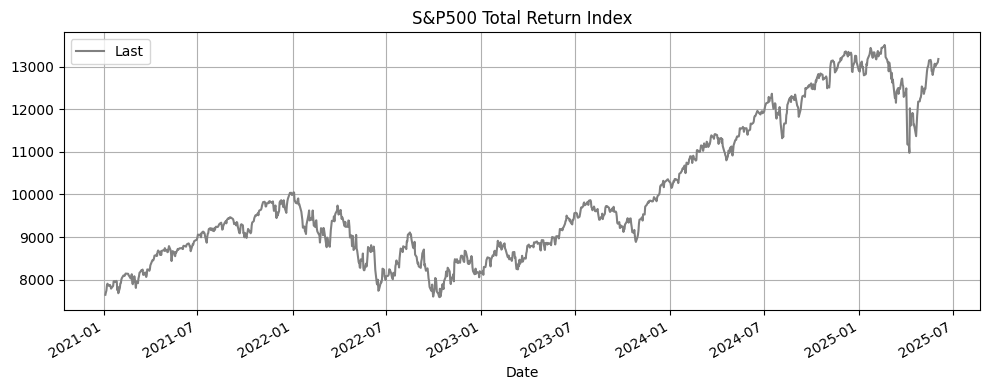

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
sp500 = pd.read_csv('Data/sp500_tr.csv', parse_dates=True, index_col='Date', decimal='.', date_format='%d-%m-%Y')

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sp500.plot(color='gray', ax=ax)
ax.grid()
ax.set_title('S&P500 Total Return Index')
fig.tight_layout()
fig.show()

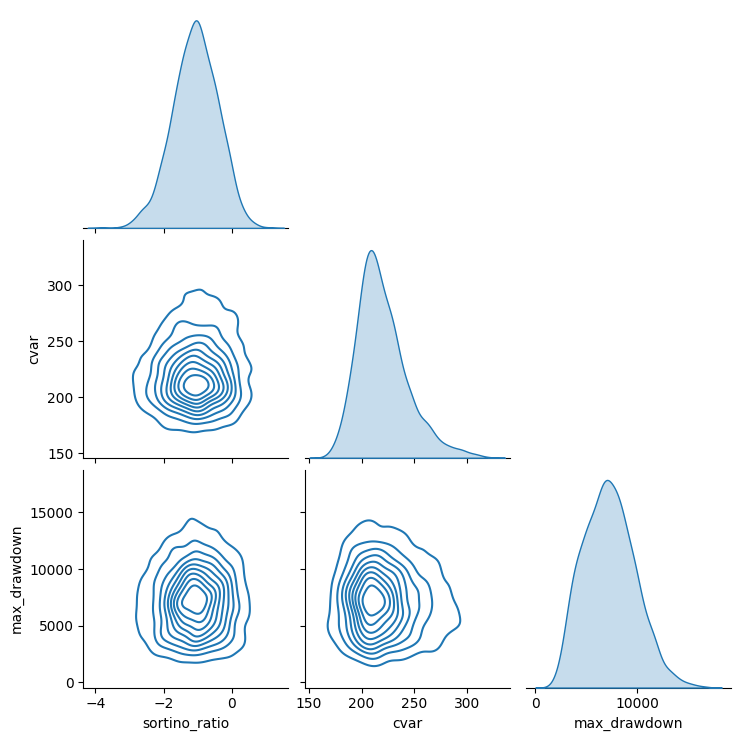

In [12]:
import seaborn as sns
import numfolio as nf

returns = sp500.Last.diff().dropna().values
metrics = ['sortino_ratio', 'cvar', 'max_drawdown']

samples = dict()

for m in metrics:
    samples[m] = nf.bootstrap_metric(returns, metric=m, n_jobs=8, n_bootstraps=2000)

samples = pd.DataFrame(samples)
sns.pairplot(samples, corner=True, kind='kde')